In [1]:
%matplotlib inline

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

In [3]:
# Create Path, Iport and Clean Data
data = pd.read_csv('../chicago_crime_2019_2023.csv')
df = data.drop_duplicates()
df = df.dropna()
df.head()

,unique_key,date,block,primary_type,description,ward,community_area
0,12465794,2021-08-27 10:00:00 UTC,104XX S MICHIGAN AVE,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - OTHER,9.0,49.0
1,12788122,2022-08-08 11:42:00 UTC,007XX E 103RD ST,ROBBERY,AGGRAVATED VEHICULAR HIJACKING,9.0,50.0
2,12502168,2021-10-04 08:10:00 UTC,0000X W 103RD ST,ROBBERY,ATTEMPT ARMED - HANDGUN,34.0,49.0
3,13001633,2023-03-05 05:15:00 UTC,009XX E 104TH ST,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,9.0,50.0
4,11830976,2019-09-16 11:53:00 UTC,009XX E 104TH ST,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,9.0,50.0


In [4]:
# Determine the counts of Crime's Primary Types
crime_types = df["primary_type"].value_counts()
crime_types

primary_type
THEFT                                242347
BATTERY                              206447
CRIMINAL DAMAGE                      126933
ASSAULT                               97390
DECEPTIVE PRACTICE                    83661
MOTOR VEHICLE THEFT                   73562
OTHER OFFENSE                         69687
ROBBERY                               40810
WEAPONS VIOLATION                     39384
BURGLARY                              38242
NARCOTICS                             36453
CRIMINAL TRESPASS                     22207
OFFENSE INVOLVING CHILDREN             9598
CRIMINAL SEXUAL ASSAULT                6202
SEX OFFENSE                            5680
PUBLIC PEACE VIOLATION                 4766
INTERFERENCE WITH PUBLIC OFFICER       3357
HOMICIDE                               3322
ARSON                                  2303
STALKING                               1634
PROSTITUTION                           1530
CRIM SEXUAL ASSAULT                     983
LIQUOR LAW VIOLATIO

In [5]:
comm_counts = df["community_area"].value_counts()
comm_counts

community_area
25.0    61169
8.0     47274
28.0    40137
43.0    38987
32.0    36044
        ...  
55.0     2828
12.0     2505
74.0     2450
47.0     1673
9.0      1283
Name: count, Length: 77, dtype: int64

In [6]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])


In [7]:
# Extract year from 'date' and create a new column 'year'
df['year'] = df['date'].dt.year


In [8]:
# Count the number of crimes per year for each crime type
crime_count_per_year_type = df.groupby(['year', 'primary_type']).size().unstack(fill_value=0)


In [9]:
# Calculate the difference in crime counts between years
crime_diff = crime_count_per_year_type.diff().abs()


In [10]:
# Create a new DataFrame to store the year and decrease value for each crime type
crime_decrease = pd.DataFrame(columns=['year', 'decrease'])


In [ ]:
# For each crime type, find the year with the greatest decrease
for crime_type in crime_diff.columns:
    # Get the row index (year) with the max decrease
    year = crime_diff[crime_type].idxmax()
    # Get the max decrease value
    decrease = crime_diff.loc[year, crime_type]
    # Append the results to the DataFrame
    crime_decrease = crime_decrease.append({'year': year, 'decrease': decrease}, ignore_index=True)
    

In [ ]:
# Set the crime types as the index of the DataFrame
crime_decrease.index = crime_diff.columns


In [33]:
# Sort by decrease value and get the top 3
top_3_decrease = crime_decrease.sort_values(by='decrease', ascending=False).head(3)


In [71]:
print(top_3_decrease)

Empty DataFrame
Columns: [year, decrease]
Index: []


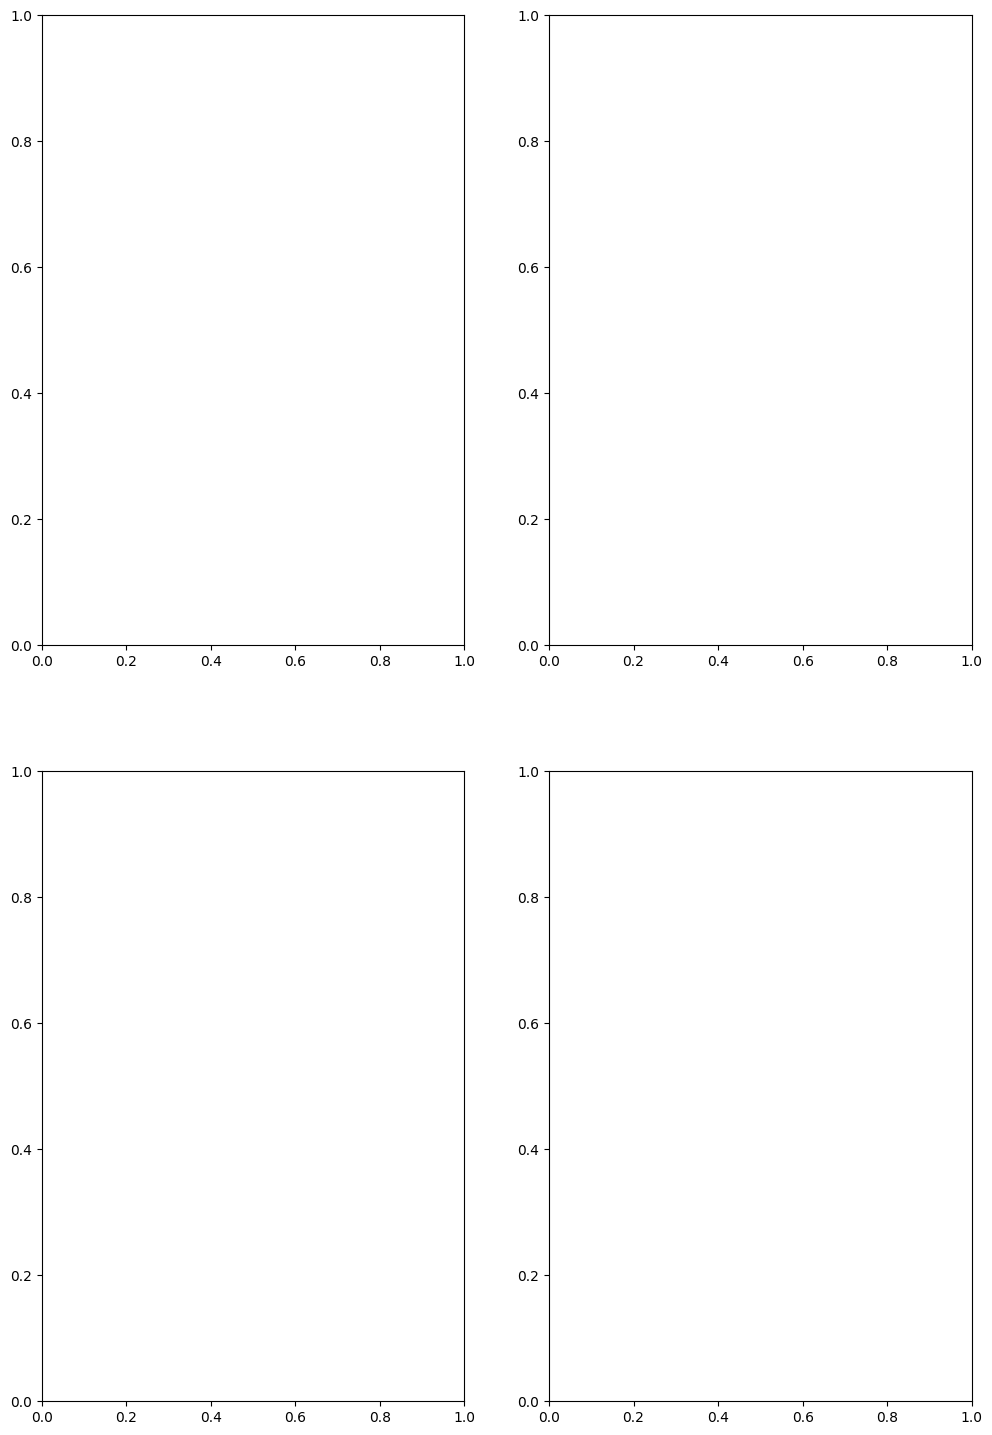

In [37]:
# Create a figure with 3 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 18))


In [69]:
# For each of the top 3 crimes
for i, crime_type in enumerate(top_3_decrease.index):
    if i != 1:
        prev_year_count = crime_count_per_year_type.loc[top_3_decrease.loc[crime_type, 'year'] - 1, crime_type]
        decrease_percent = top_3_decrease.loc[crime_type, 'decrease'] / prev_year_count * 100

        # Create descriptive text
        explanation = f"The crime rate with the largest decrease in {top_3_decrease.loc[crime_type, 'year']} was {crime_type}.\n"
        explanation += f"The {crime_type.lower()} rate in Chicago decreased by almost {np.round(decrease_percent, 2)}% in {top_3_decrease.loc[crime_type, 'year']}."


        # Plot the crime type on a subplot
        if i == 2:
            i = i - 1
        axs[i, 0].plot(crime_count_per_year_type.index, crime_count_per_year_type[crime_type], label=crime_type, linewidth=2)
        axs[i, 0].set_xlabel('Year')
        axs[i, 0].set_ylabel('Number of Crimes')
        axs[i, 0].set_title(f"Number of {crime_type} Crimes Per Year")
        axs[i, 0].grid(True)
        axs[i, 0].legend()

        axs[i, 1].text(0.5, 0.5, explanation, transform=axs[i, 1].transAxes,
	                   verticalalignment='center', horizontalalignment='left', fontsize=12)
        axs[i, 1].axis('off')

        

In [ ]:
# Remove empty subplots if there are less than 3 crime types
if len(top_3_decrease) < 2:
    for i in range(len(top_3_decrease), 2):
        fig.delaxes(axs[i, 0])
        fig.delaxes(axs[i, 1])

In [40]:
# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

<Figure size 640x480 with 0 Axes>

In [41]:
crime_dates = df["date"].value_counts()
crime_dates = crime_dates.sort_values
crime_dates

<bound method Series.sort_values of date
2021-01-01 12:00:00+00:00    168
2020-01-01 12:00:00+00:00    153
2022-01-01 12:00:00+00:00    144
2019-01-01 12:00:00+00:00    142
2023-01-01 12:00:00+00:00    141
                            ... 
2019-02-26 02:58:00+00:00      1
2019-12-10 11:25:00+00:00      1
2020-09-26 08:45:00+00:00      1
2019-08-03 08:58:00+00:00      1
2021-02-06 05:21:00+00:00      1
Name: count, Length: 448695, dtype: int64>

In [42]:
crime_description = df["description"].value_counts()
crime_description

description
SIMPLE                                         128383
DOMESTIC BATTERY SIMPLE                         97820
$500 AND UNDER                                  89600
OVER $500                                       74408
TO VEHICLE                                      64814
                                                ...  
IN TAVERN                                           1
ATTEMPT ARMED: HANDGUN                              1
THEFT/RECOVERY: CYCLE, SCOOTER, BIKE NO VIN         1
REFUSING TO AID AN OFFICER                          1
AGGRAVATED PO: OTHER DANGEROUS WEAPON               1
Name: count, Length: 472, dtype: int64

In [43]:
# Set the paramaters of the Date Range

crime_start_date = df['date'].min()
crime_last_date = df['date'].max()

print(f"Crime data starts at {crime_start_date}")
print(f"Crime data ends at {crime_last_date}")

Crime data starts at 2019-01-01 01:00:00+00:00
Crime data ends at 2023-10-07 12:00:00+00:00


In [12]:
# Define the time period Pre-COVID (2019-01-01 to 2020-03-15)
pre_covid = data[(data['date'] >= '2019-01-01') & (data['date'] <= '2020-03-15')]

# Define the time period during COVID (2020-03-16 to 2021-06-11)
during_covid_2020 = data[(data['date'] >= '2020-03-16') & (data['date'] <= '2021-06-11')]

# Define the time period post COVID (2021-06-12 to 2023-10-06)
post_covid = data[(data['date'] >= '2021-06-12') & (data['date'] <= '2023-10-06')]

# Group the data by 'primary_type' and calculate the counts for each time period
pre_covid_counts = pre_covid['primary_type'].value_counts()
during_covid_2020_counts = during_covid_2020['primary_type'].value_counts()
post_covid_counts = post_covid['primary_type'].value_counts()

In [13]:
# Calculate the decrease for each category
crime_decrease_2020 = pre_covid_counts - during_covid_2020_counts

# Sort the categories by the decrease in crime count
crime_decrease_2020 = crime_decrease_2020.sort_values()
crime_decrease_2020

primary_type
WEAPONS VIOLATION                    -3588.0
MOTOR VEHICLE THEFT                  -1679.0
DECEPTIVE PRACTICE                    -925.0
CRIMINAL SEXUAL ASSAULT               -513.0
HOMICIDE                              -385.0
ARSON                                 -313.0
STALKING                               -38.0
OBSCENITY                               -8.0
INTIMIDATION                            -8.0
NON-CRIMINAL                             0.0
PUBLIC INDECENCY                         3.0
OTHER NARCOTIC VIOLATION                 8.0
HUMAN TRAFFICKING                       10.0
CONCEALED CARRY LICENSE VIOLATION       72.0
KIDNAPPING                              73.0
LIQUOR LAW VIOLATION                   116.0
GAMBLING                               119.0
SEX OFFENSE                            444.0
ROBBERY                                485.0
PUBLIC PEACE VIOLATION                 506.0
PROSTITUTION                           536.0
CRIMINAL DAMAGE                        638

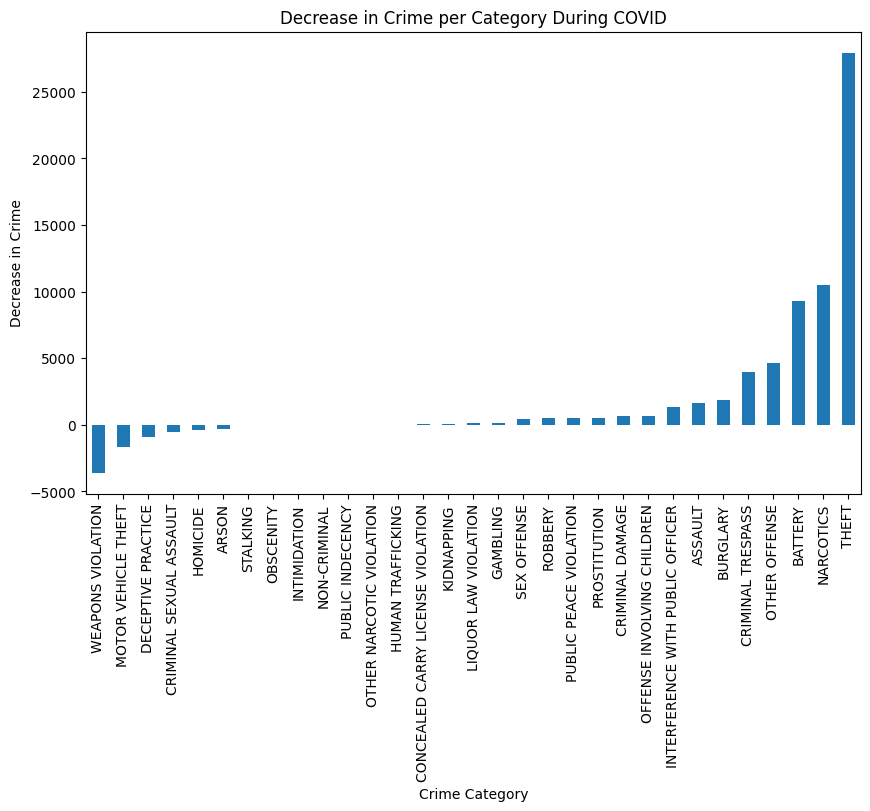

In [14]:
# Create a bar chart
plt.figure(figsize=(10, 6))
crime_decrease_2020.dropna().plot(kind='bar')
plt.title('Decrease in Crime per Category During COVID')
plt.xlabel('Crime Category')
plt.ylabel('Decrease in Crime')
plt.show()

In [15]:
# Calculate the Decrease of Crimes from the peak of COVID to the end of the sample.
crime_decrease_2023 = during_covid_2020_counts - post_covid_counts

# Sort the categories by the decrease in crime count
crime_decrease_2023 = crime_decrease_2023.sort_values()



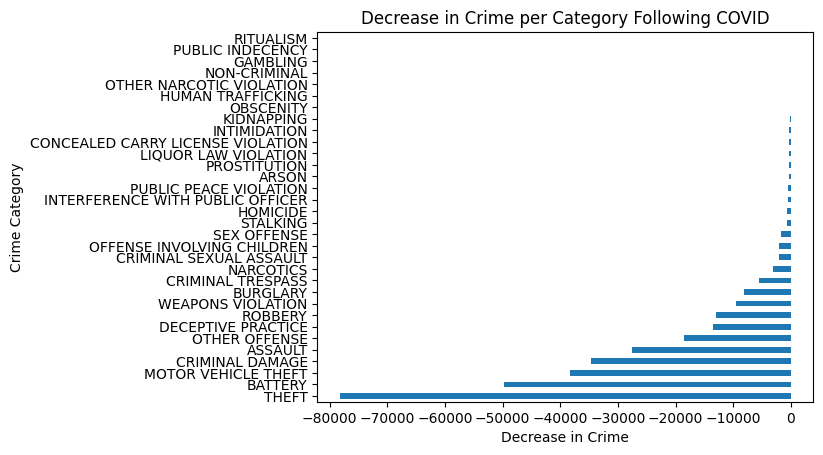

In [16]:
# Create a bar chart
plt.figure
# (figsize=(4, 4))
crime_decrease_2023.plot(kind='barh')
plt.title('Decrease in Crime per Category Following COVID')
plt.xlabel('Decrease in Crime')
plt.ylabel('Crime Category')
plt.show()

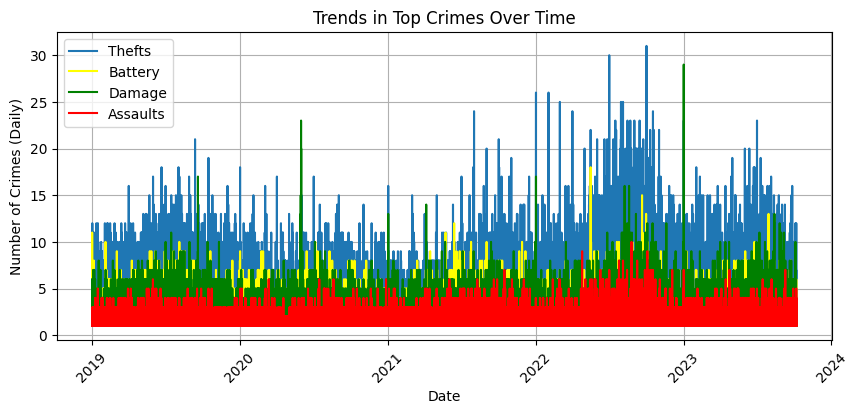

In [17]:
# Filter the data for Top Crimes
theft_data = df[df['primary_type'] == 'THEFT']
battery_data = df[df['primary_type'] == 'BATTERY']
narc_data = df[df['primary_type'] == 'NARCOTICS']
damage = df[df['primary_type'] == "CRIMINAL DAMAGE"]
assault = df[df['primary_type'] == 'ASSAULT']

# Group the data by 'date' and calculate the daily counts
theft_counts = theft_data.groupby('date').size()
battery_counts = battery_data.groupby('date').size()
narc_counts = narc_data.groupby('date').size()
damage_counts = damage.groupby('date').size()
assault_counts = assault.groupby('date').size()

# Create a line plot to show the trend of Crimes over time
plt.figure(figsize=(10, 4))
plt.plot(theft_counts.index, theft_counts.values, label='Thefts')
plt.plot(battery_counts.index, battery_counts.values, label='Battery', color="yellow")
plt.plot(damage_counts.index, damage_counts.values, label='Damage',color='green')
plt.plot(assault_counts.index, assault_counts.values, label='Assaults', color='red')

plt.title('Trends in Top Crimes Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Crimes (Daily)')
plt.xticks(rotation=45)  
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# Group the data by 'community_area' and calculate the theft counts for each time period
pre_covid_counts = pre_covid['community_area'].value_counts()
during_covid_2020_counts = during_covid_2020['community_area'].value_counts()

# Calculate the decrease in theft counts for each community area
theft_2020_decrease = pre_covid_counts - during_covid_2020_counts


# Find the community area with the largest decrease in theft
community_area_with_largest_decrease = theft_2020_decrease.idxmax()
largest_decrease_value = theft_2020_decrease.max()

In [19]:
print(f"The Community with the largest decrease in thefts in 2020 was {community_area_with_largest_decrease}, with {largest_decrease_value} fewer thefts")

The Community with the largest decrease in thefts in 2020 was 32.0, with 6984 fewer thefts


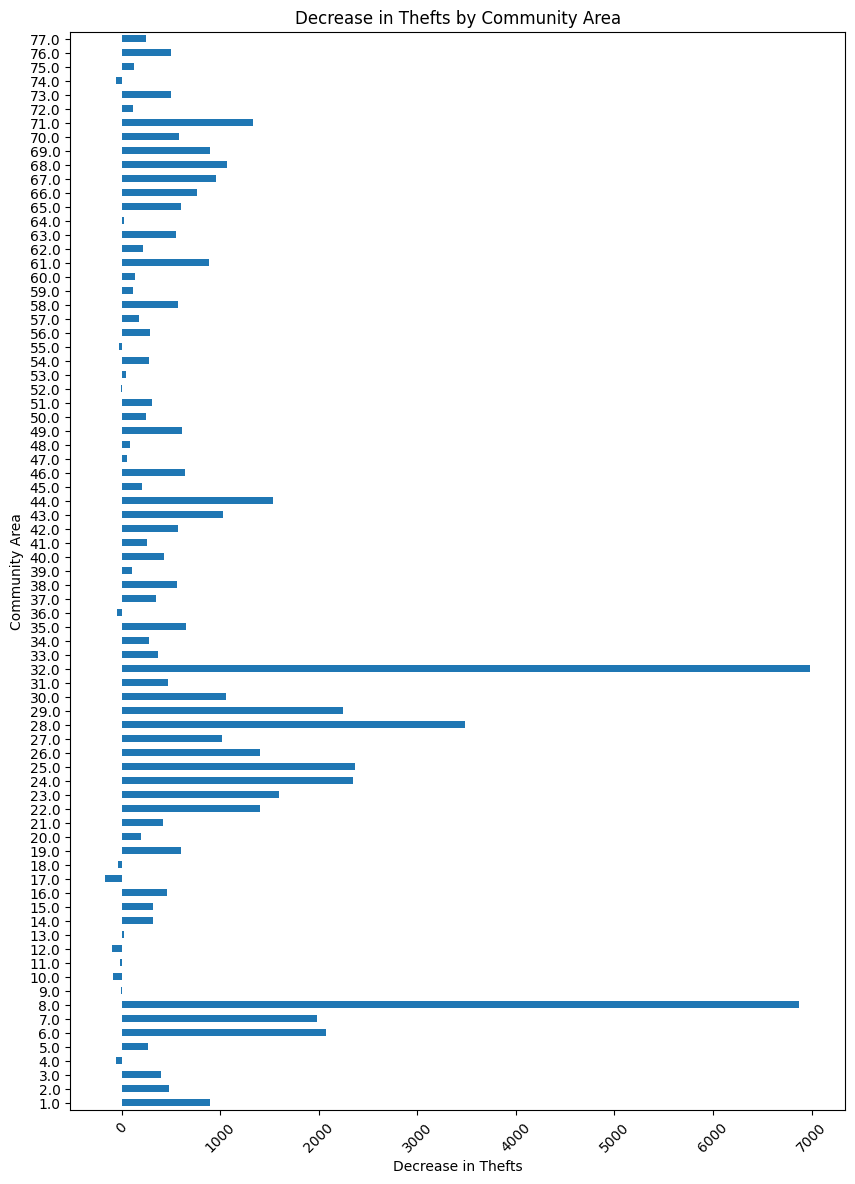

In [20]:
# Create a bar chart to show the community area with the largest decrease in theft
plt.figure(figsize=(10, 14))
theft_2020_decrease.plot(kind='barh')
plt.title('Decrease in Thefts by Community Area')
plt.xlabel('Decrease in Thefts')
plt.ylabel('Community Area')
plt.xticks(rotation=45)
plt.show()

The Communities with the Greatest Decrease in Thefts are #32(The Loop) and closely followed by #8(Near North Side)

In [21]:
# Create a new DataFrame to store the year and decrease value for each crime type
crime_decrease = []


In [22]:
# For each crime type, find the year with the greatest decrease
for crime_type in crime_diff.columns:
    # Check if there is any decrease at all
    decrease_years = crime_diff[crime_type][crime_diff[crime_type] < 0]
    if not decrease_years.empty:
        # Get the row index (year) with the max decrease
        year = decrease_years.idxmin()
        # Get the max decrease value
        decrease = crime_diff.loc[year, crime_type]
        # Append the results to the list
        crime_decrease.append({'crime_type': crime_type, 'year': year, 'decrease': decrease})


In [25]:
# Convert list of dictionaries to DataFrame
crime_decrease = pd.DataFrame(crime_decrease)
